# US Carbon Dioxide (CO₂) emmisions analysis : A Sectoral and Regional Perspective to Inform ESG Reporting and Climate Policy

This analysis is an **Exploratory Data Analysis (EDA)** project aimed at uncovering trends and patterns in U.S. CO₂ emissions data across time, regions, sectors, and fuel types. The primary goal is to support:

- ESG and sustainability reporting,
- Climate strategy development,
- Policy-relevant insight generation.

The objectives of this project were to:
- Evaluate total vs average emissions.
- Assess temporal trends in CO₂ emssions.
- Uncovering and comparing trends in sectors and fuels.
- Discover which state emits the most CO₂ and to see what drove those emissions from the years 2000 and onwards.


As such, the focus is on **descriptive summaries**, **visual pattern recognition**, and **interactive exploration**, rather than formal hypothesis testing or inferential statistics. Statistical tests (e.g., t-tests, ANOVA) are typically reserved for situations where we are testing causal relationships or comparing controlled groups, which is not the objective here.

The insights drawn from totals, averages, and their temporal-spatial variation are sufficient to guide strategic sustainability decisions and communicate key findings effectively.


In [1]:
# Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Importing data set from kaggle

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdelrahman16/co2-emissions-usa")

print("Path to dataset files:", path)

100%|██████████| 546k/546k [00:00<00:00, 18.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/abdelrahman16/co2-emissions-usa/versions/1


In [3]:
# List files in the downloaded directory to find the CSV file name
import os
print("Files in the downloaded directory:")
for file in os.listdir(path):
    print(file)


Files in the downloaded directory:
emissions.csv


In [4]:
# Load Dataset
# Assuming the CSV file is named 'co2-emissions-usa.csv' based on the dataset name.
# If the file name is different, replace 'co-_emissions-usa.csv' with the actual name.
# Find the actual CSV file name in the downloaded directory
csv_file_name = None
for file in os.listdir(path):
    if file.endswith('.csv'):
        csv_file_name = file
        break

if csv_file_name:
    csv_file_path = os.path.join(path, csv_file_name) # Construct the full path to the CSV file
    df = pd.read_csv(csv_file_path)
    df.head()
else:
    print("No CSV file found in the downloaded directory.")

### Inspecting and cleaning the data

The following code was used to prepare the data for analysis after cleaning it.

In [5]:
# Building a wrangle function to clean the data
import pandas as pd

def wrangle_co2_emissions(df):
    """
    Cleans the CO₂ emissions dataset by removing aggregate rows:
    - Removes 'United States' rows
    - Removes 'All Fuels' rows
    - Removes 'Total carbon dioxide emissions from all sectors' rows
    """
    df1 = df.copy()

    # Drop rows where the state is "United States"
    df1 = df1[df1["state-name"] != "United States"]

    # Drop rows where fuel is "All Fuels"
    df1 = df1[df1["fuel-name"] != "All Fuels"]

    # Drop rows where sector is "Total carbon dioxide emissions from all sectors"
    df1 = df1[
        df1["sector-name"] != "Total carbon dioxide emissions from all sectors"
    ]

    # Rename 'value' column to 'CO2 Emissions (tCO2e)'
    df1.rename(columns={"value": "CO2 Emissions (tCO2e)"}, inplace=True)

    # Remove 'carbon dioxide emissions' from the 'sector-name' column
    df1['sector-name'] = df1['sector-name'].str.replace(' carbon dioxide emissions', '', regex=False).str.strip()


    # Optional: Reset index
    df1.reset_index(drop=True, inplace=True)

    return df1



The following code was used to perform an initial inspection of the raw dataset to identify potential issues such as missing values, inconsistent formats, or duplicates. After applying the wrangle() function to preprocess and clean the data, a second inspection was conducted to validate the integrity and readiness of the dataset for analysis.

In [6]:
df1 = wrangle_co2_emissions(df)
df1.head()

,year,state-name,sector-name,fuel-name,CO2 Emissions (tCO2e)
0,1970,Alabama,Industrial,Coal,26.721507
1,1970,Alabama,Industrial,Petroleum,3.577779
2,1970,Alabama,Industrial,Natural Gas,8.944097
3,1970,Alabama,Residential,Coal,0.163635
4,1970,Alabama,Residential,Petroleum,1.123947


In [7]:
df1.shape

(34916, 5)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34916 entries, 0 to 34915
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   34916 non-null  int64  
 1   state-name             34916 non-null  object 
 2   sector-name            34916 non-null  object 
 3   fuel-name              34916 non-null  object 
 4   CO2 Emissions (tCO2e)  34916 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.3+ MB


In [9]:
df1.isnull().sum()

,0
year,0
state-name,0
sector-name,0
fuel-name,0
CO2 Emissions (tCO2e),0


In [10]:
df1["state-name"].nunique()

51

In [11]:
df1['sector-name'].value_counts()

,count
sector-name,
Industrial,7652
Electric Power,7448
Commercial,7320
Residential,6996
Transportation,5500


In [12]:
df1['fuel-name'].value_counts()

,count
fuel-name,
Petroleum,13238
Natural Gas,12893
Coal,8785


# Exploratory Data Analysis

**Assesing temporal trends in CO2 emissions**

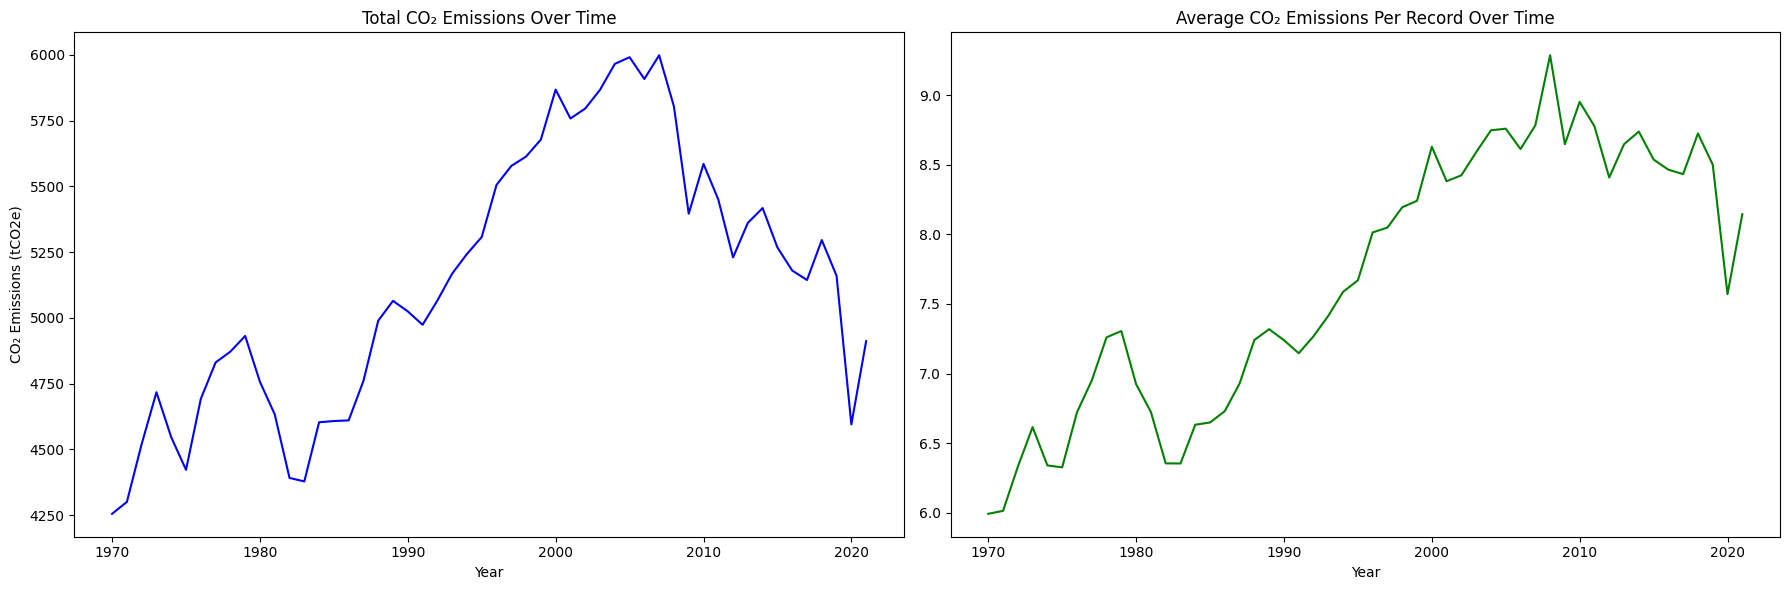

In [13]:
# Group data
emissions_by_year_sum = df1.groupby("year")["CO2 Emissions (tCO2e)"].sum()
emissions_by_year_avg = df1.groupby("year")["CO2 Emissions (tCO2e)"].mean()

# Set up side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # 1 row, 2 columns

# Plot total emissions
axes[0].plot(emissions_by_year_sum.index, emissions_by_year_sum.values, color='blue')
axes[0].set_title("Total CO₂ Emissions Over Time")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("CO₂ Emissions (tCO2e)")

# Plot average emissions
axes[1].plot(emissions_by_year_avg.index, emissions_by_year_avg.values, color='green')
axes[1].set_title("Average CO₂ Emissions Per Record Over Time")
axes[1].set_xlabel("Year")


# Improve layout
plt.tight_layout()
plt.show()


Correlation between Total and Average Trends: The observation that the average CO₂ emissions per record follows a similar pattern to the total CO₂ emissions suggests that the overall trend in total emissions is significantly influenced by the changes in the average emission levels of the activities or sources being recorded in the dataset. If the average line was flat while the total line increased, it might indicate that the total emissions are increasing simply because more emission sources are being added or recorded over time, even if each source's emission level isn't changing much. However, the similar shapes indicate that the intensity of emissions per record is a major driver of the total emissions trend.

Peak in Late 2000s/Early 2010s: The peak observed in both total and average emissions during this period could be attributed to various factors such as economic activity, energy consumption patterns, or specific policy changes during those years. Further investigation into events or policies around that time would be needed for a more definitive interpretation.

The decrease in emissions after the peak could be due to several factors, including:

Economic downturns (like the 2008 financial crisis and its aftermath, or the initial impact of the COVID-19 pandemic around 2020).
Shifts in energy sources (e.g., move towards renewable energy or natural gas instead of coal).
Improvements in energy efficiency.
Implementation of climate policies.
Slight Rebound After 2020: The slight increase after 2020 could reflect an economic recovery following the initial impact of the pandemic, leading to increased energy consumption and activity.

**Sector and fuel pivot matrix**

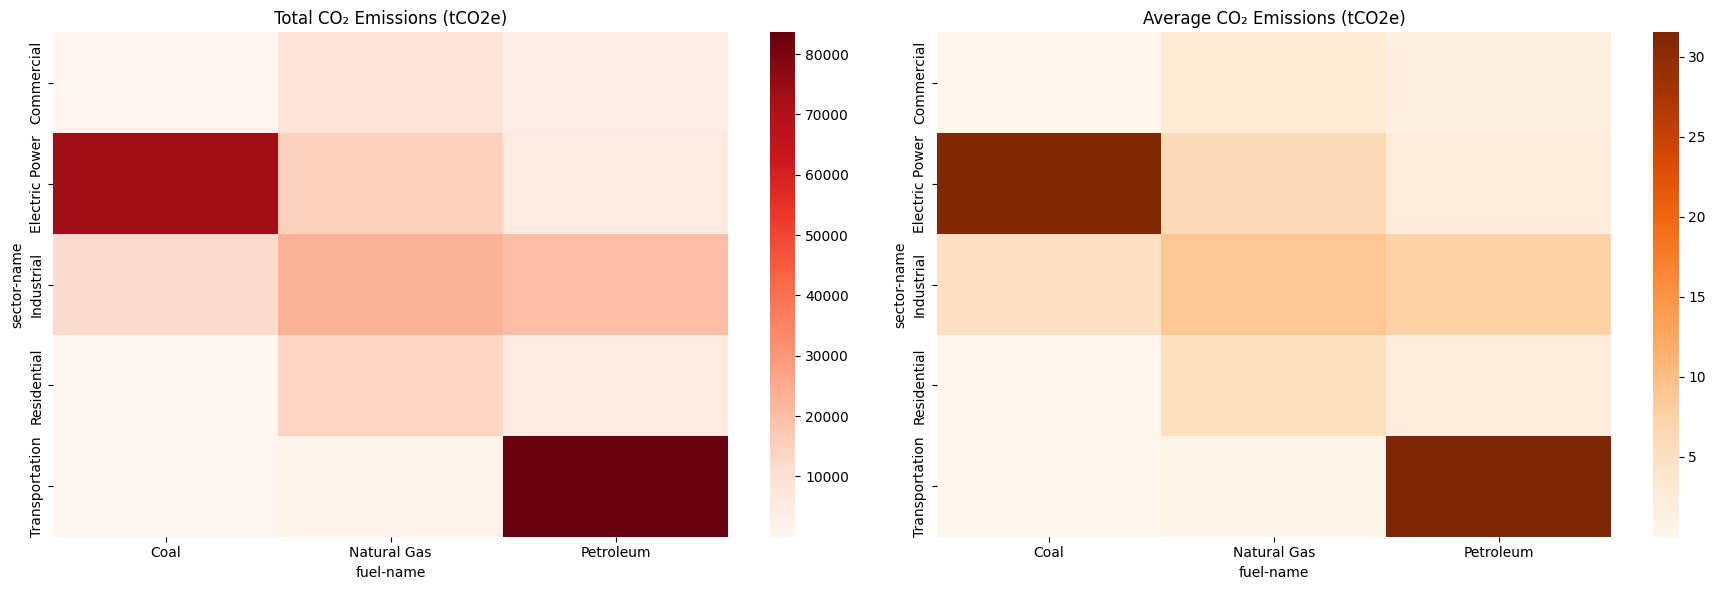

In [14]:
# Create the two pivot tables
pivot_sum = df1.pivot_table(
    values="CO2 Emissions (tCO2e)",
    index="sector-name",
    columns="fuel-name",
    aggfunc="sum"
)

pivot_mean = df1.pivot_table(
    values="CO2 Emissions (tCO2e)",
    index="sector-name",
    columns="fuel-name",
    aggfunc="mean"
)

# Set up side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Heatmap for total emissions
sns.heatmap(pivot_sum, cmap="Reds", ax=axes[0],  fmt=".1f")
axes[0].set_title("Total CO₂ Emissions (tCO2e)")

# Heatmap for average emissions
sns.heatmap(pivot_mean, cmap="Oranges", ax=axes[1], fmt=".1f")
axes[1].set_title("Average CO₂ Emissions (tCO2e)")

# Improve layout
plt.tight_layout()
plt.show()




Dominant Emission Combinations:

The heatmaps clearly highlight the sector-fuel combinations with the most significant CO₂ emissions. Two combinations stand out as major contributors to both total emissions and average emission intensity:
Transportation Sector and Petroleum Fuels: This pairing shows consistently high values in both the total and average emission heatmaps. This indicates that the transportation sector's reliance on petroleum is a primary driver of overall CO₂ emissions and is also an emission-intensive activity per record.

Electrical Power Sector and Coal: The electrical power sector's use of coal also appears as a significant hotspot in both heatmaps. This underscores the substantial contribution of coal-fired power generation to cumulative CO₂ emissions and its high emission intensity.

Total vs. Average Emissions Insights:

The strong correlation observed between the total and average emission heatmaps for the leading combinations (Transportation/Petroleum and Electrical Power/Coal) suggests that these are not only large in overall volume but also among the most polluting on a per-record basis.
Differences between the maps (where a cell might be dark in one but lighter in the other) could point to activities that are either highly intense but less frequent/widespread (high average, lower total) or less intense individually but very common (lower average, high total). Further investigation into specific combinations could reveal these nuances.



**Comparing average carobon emmisions across all states**

In [15]:
# Group by state and calculate mean CO₂ emissions
avg_emissions_by_state = df1.groupby("state-name")["CO2 Emissions (tCO2e)"].mean().reset_index()

# Rename column for clarity
avg_emissions_by_state.rename(columns={"CO2 Emissions (tCO2e)": "Average CO2 Emissions (tCO2e)"}, inplace=True)

# Sort descending for easy viewing
avg_emissions_by_state = avg_emissions_by_state.sort_values(by="Average CO2 Emissions (tCO2e)", ascending=False).reset_index(drop=True)

# Display result
print(avg_emissions_by_state.head(5))


     state-name  Average CO2 Emissions (tCO2e)
0         Texas                      43.015387
1    California                      27.029344
2  Pennsylvania                      19.173258
3          Ohio                      18.290951
4     Louisiana                      16.054856


In [16]:
# Dictionary to map full names to abbreviations
us_state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    'District of Columbia': 'DC'
}

# Apply the mapping
avg_emissions_by_state["state_code"] = avg_emissions_by_state["state-name"].map(us_state_abbrev)


In [17]:
# --- AVERAGE EMISSIONS MAP ---
fig_avg = px.choropleth(
    avg_emissions_by_state,
    locations="state_code",
    locationmode="USA-states",
    color="Average CO2 Emissions (tCO2e)",
    color_continuous_scale="YlGnBu",
    scope="usa",
    title="Average CO₂ Emissions by U.S. State (1970–2021)",
    labels={"Average CO2 Emissions (tCO2e)": "Avg CO₂ (tCO2e)"}
)
fig_avg.show()

# --- TOTAL EMISSIONS MAP ---
# Group and rename
total_emissions_by_state = df1.groupby("state-name")["CO2 Emissions (tCO2e)"].sum().reset_index()
total_emissions_by_state.rename(columns={"CO2 Emissions (tCO2e)": "Total CO2 Emissions (tCO2e)"}, inplace=True)
total_emissions_by_state["state_code"] = total_emissions_by_state["state-name"].map(us_state_abbrev)

fig_total = px.choropleth(
    total_emissions_by_state,
    locations="state_code",
    locationmode="USA-states",
    color="Total CO2 Emissions (tCO2e)",
    color_continuous_scale="YlGnBu",
    scope="usa",
    title="Total CO₂ Emissions by U.S. State (1970–2021)",
    labels={"Total CO2 Emissions (tCO2e)": "Total CO₂ (tCO2e)"}
)
fig_total.show()


**The output of this code is viewable as PNG files. click on the follwoing files: avg_CO2_emissions_map.png and total_CO2_emissions_map.png to view the maps depicting the geospatial distribution of CO₂ emissions in the USA**

Regional Emission Hotspots: The choropleth maps clearly indicate that certain states exhibit significantly higher levels of both average and total CO₂ emissions compared to others. The darker shades on the maps highlight these regions.

Total Emissions Dominance: The map showing total CO₂ emissions reveals the cumulative contribution of each state over the entire period. States with large industrial bases, high population density, or significant energy production infrastructure tend to show higher total emissions.

Average Emission Intensity: The map illustrating average CO₂ emissions per record provides insight into the emission intensity of activities within each state. A high average emission suggests that the typical recorded activity in that state produces a substantial amount of CO₂. This can be influenced by the types of industries present, the fuel mix used for energy, and transportation patterns.

Correlation Between Total and Average: A comparison of the two maps reveals a strong correlation: states with high total emissions often also have high average emissions. This suggests that in these states, the volume of emission-intensive activities is a major driver of their overall CO₂ footprint.



**Analysing Top 5 State emissions**

Top 5 Averages

In [18]:
# Step 3: Sort by emissions descending
# Corrected the column name to "Average CO2 Emissions (tCO2e)"
# The previous cell overwrote avg_emissions_by_state, and the column name is back to the original.
# We need to sort by the column that actually exists in the current avg_emissions_by_state DataFrame.
# Based on the global variables, the column is currently named 'CO2 Emissions (tCO2e)'.
# Let's re-calculate and rename it here to avoid reliance on the exact state of previous cells,
# which is better practice for self-contained code blocks.

# Recalculate average emissions by state just before sorting to ensure correct column name
avg_emissions_by_state = df1.groupby("state-name")["CO2 Emissions (tCO2e)"].mean().reset_index()

# Rename column for clarity
avg_emissions_by_state.rename(columns={"CO2 Emissions (tCO2e)": "Average CO2 Emissions (tCO2e)"}, inplace=True)


top_states = avg_emissions_by_state.sort_values(by="Average CO2 Emissions (tCO2e)", ascending=False)

# Remove the "United States" row from the result
# Note: The wrangle function already removed "United States", but this is good practice
top_states_cleaned = top_states[top_states["state-name"] != "United States"]

# Get the top 5 states only
# Changed head(10) to head(5) based on the print statement description "Top 5 States..."
top_5_states = top_states_cleaned.head().reset_index(drop=True)

# Display as a clean DataFrame
print("Top 5 States with Highest Average CO₂ Emissions:")
print(top_5_states)

Top 5 States with Highest Average CO₂ Emissions:
     state-name  Average CO2 Emissions (tCO2e)
0         Texas                      43.015387
1    California                      27.029344
2  Pennsylvania                      19.173258
3          Ohio                      18.290951
4     Louisiana                      16.054856


Top 5 totals

In [19]:
# Calculate the total emissions per state
total_emissions_by_state = df1.groupby("state-name")["CO2 Emissions (tCO2e)"].sum().reset_index()

# Rename the column for clarity
total_emissions_by_state.rename(columns={"CO2 Emissions (tCO2e)": "Total CO2 Emissions (tCO2e)"}, inplace=True)

# Sort by total emissions descending
top_states = total_emissions_by_state.sort_values(by="Total CO2 Emissions (tCO2e)", ascending=False)

# Remove the "United States" row from the result (already done by wrangle function, but good practice)
top_states_cleaned = top_states[top_states["state-name"] != "United States"]

# Get the top 5 states with the highest total emissions
top_5_states = top_states_cleaned.head().reset_index(drop=True)

# Display as a clean DataFrame
print("Top 5 States with Highest Total CO₂ Emissions:")
print(top_5_states)

Top 5 States with Highest Total CO₂ Emissions:
     state-name  Total CO2 Emissions (tCO2e)
0         Texas                 29852.678554
1    California                 18055.601943
2  Pennsylvania                 13843.092163
3          Ohio                 13132.902469
4      Illinois                 11552.794306


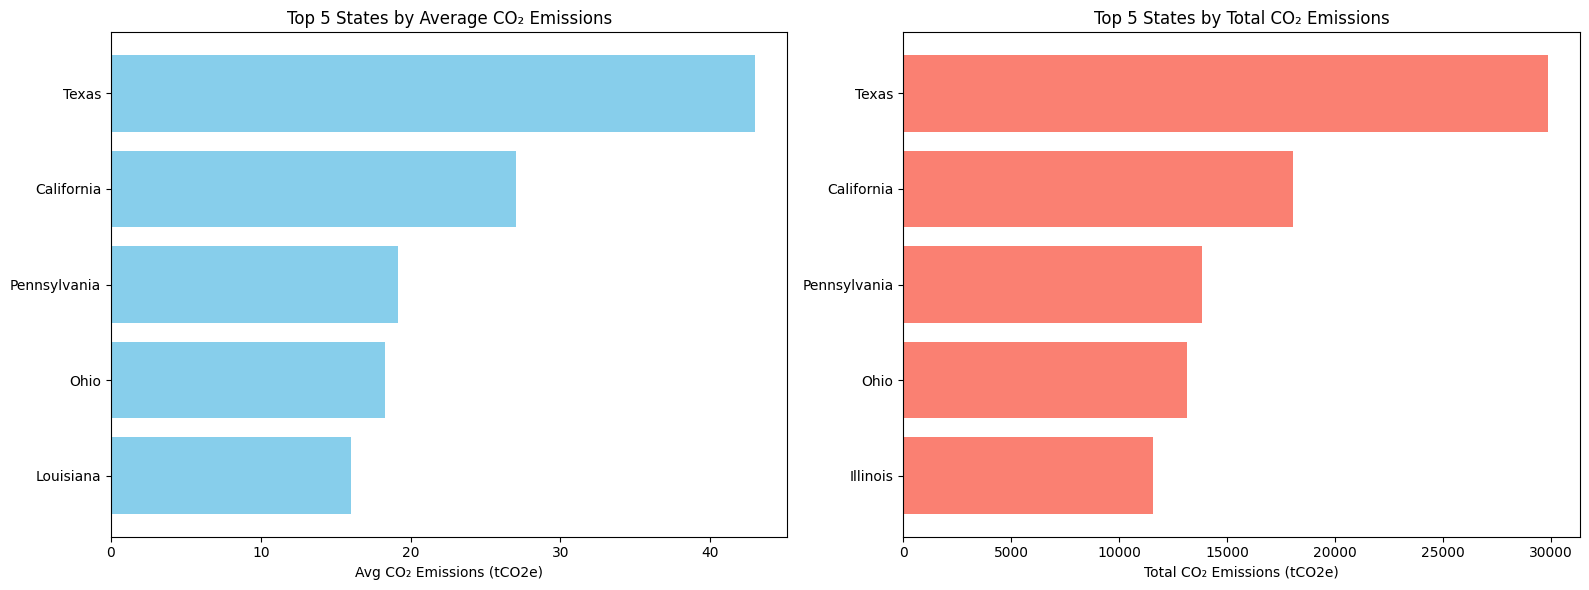

In [20]:
# Step 1: Average emissions per state
avg_emissions_by_state = df1.groupby("state-name")["CO2 Emissions (tCO2e)"].mean().reset_index()
top_5_avg = avg_emissions_by_state.sort_values(by="CO2 Emissions (tCO2e)", ascending=False).head()

# Step 2: Total emissions per state
total_emissions_by_state = df1.groupby("state-name")["CO2 Emissions (tCO2e)"].sum().reset_index()
top_5_total = total_emissions_by_state.sort_values(by="CO2 Emissions (tCO2e)", ascending=False).head()

# Step 3: Create side-by-side horizontal bar charts
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# --- Average Emissions Chart ---
axes[0].barh(top_5_avg["state-name"], top_5_avg["CO2 Emissions (tCO2e)"], color="skyblue")
axes[0].set_title("Top 5 States by Average CO₂ Emissions")
axes[0].set_xlabel("Avg CO₂ Emissions (tCO2e)")
axes[0].invert_yaxis()  # Highest at the top

# --- Total Emissions Chart ---
axes[1].barh(top_5_total["state-name"], top_5_total["CO2 Emissions (tCO2e)"], color="salmon")
axes[1].set_title("Top 5 States by Total CO₂ Emissions")
axes[1].set_xlabel("Total CO₂ Emissions (tCO2e)")
axes[1].invert_yaxis()

# --- Layout ---
plt.tight_layout()
plt.show()


The side-by-side horizontal bar charts vividly illustrate the top 5 states contributing to U.S. CO₂ emissions, differentiating between average and total emissions. The chart on the left, "Top 5 States by Average CO₂ Emissions," presents the states with the highest average CO₂ emissions per recorded activity. The length of each sky-blue bar represents the average amount of CO₂ emitted. Conversely, the chart on the right, "Top 5 States by Total CO₂ Emissions," displays the states with the highest cumulative CO₂ emissions over the entire period. The length of each salmon-colored bar indicates the total volume of CO₂ emitted by that state.

The most striking observation is the significant overlap between the states appearing in both charts. This consistency indicates that the states with the highest total emissions are also, on average, the states where emission-intensive activities are most prominent. Texas consistently appears as the state with the highest average and total CO₂ emissions, underscoring its substantial contribution to national emissions. Other states, while varying slightly in their ranking between average and total, generally maintain a high position in both lists, suggesting that their large overall emissions are not solely due to a high volume of less-intense activities, but also a significant presence of highly emitting processes.

The comparison of the bar lengths between the two charts provides further insight. For a state to rank high in both average and total emissions, it must have a combination of a large number of emission-generating activities and a high average emission per activity. If a state had a very high average emission but a relatively low total, it would imply a few highly polluting activities without a large overall scale. Conversely, a high total and low average would suggest numerous, less intense activities. The observed overlap and relative bar lengths in these charts point to the concentration of major emission sources and activities within these top states. This analysis reinforces the importance of focusing mitigation efforts on these key states and understanding the specific drivers (sectors and fuels) within them that contribute to their high average and total emission levels.


**Analysing Trends in Total Emissions across the 50 years**

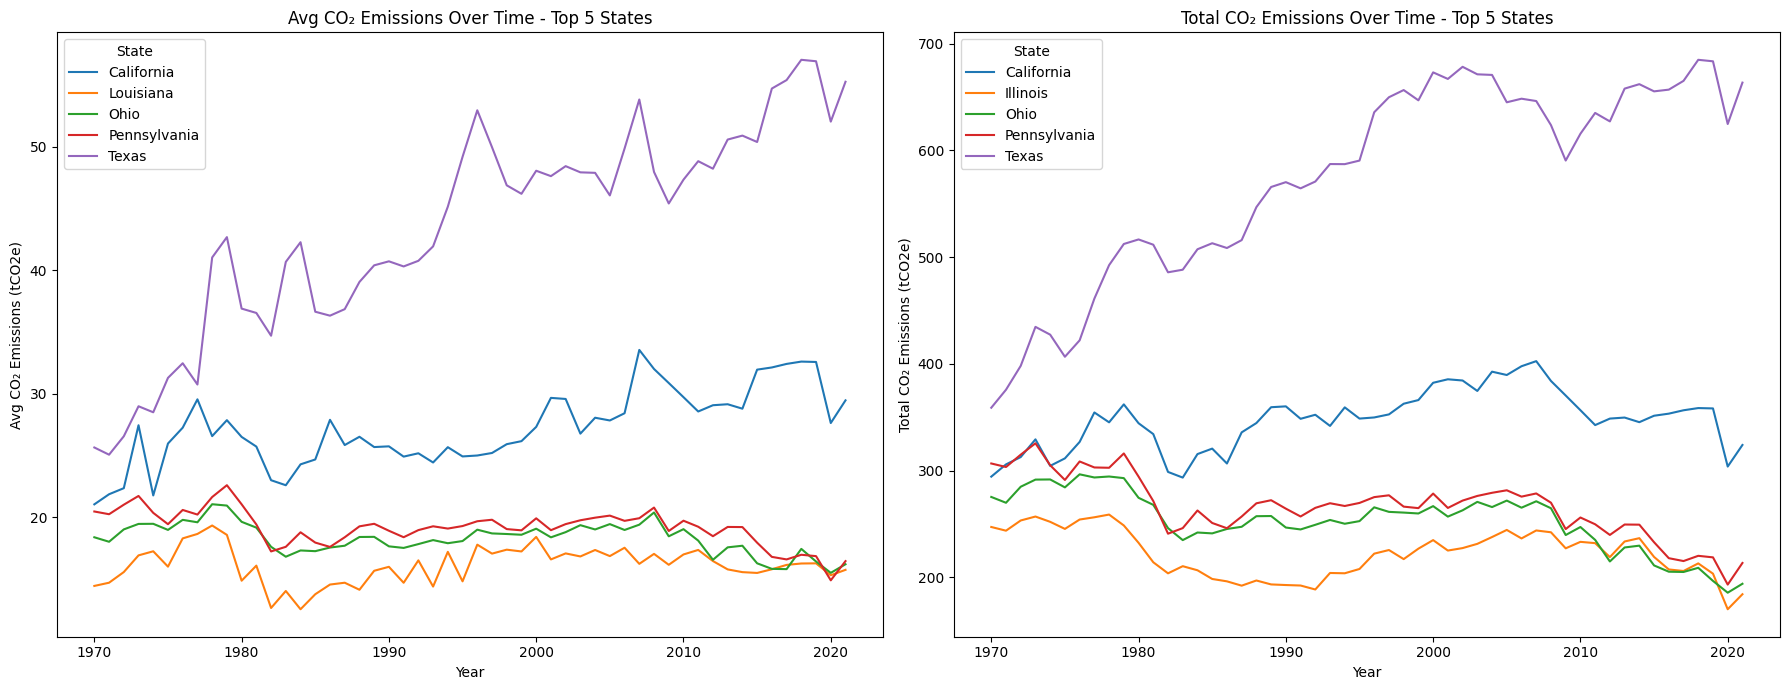

In [21]:
# --- AVERAGE EMISSIONS ANALYSIS ---
# Step 1: Top 5 by average
top_states_avg = df1.groupby('state-name')['CO2 Emissions (tCO2e)'].mean().sort_values(ascending=False).head().index

# Step 2: Filter
top_states_data_avg = df1[df1['state-name'].isin(top_states_avg)]

# Step 3: Group by year and state
avg_emissions_by_state = top_states_data_avg.groupby(['year', 'state-name'])['CO2 Emissions (tCO2e)'].mean().reset_index()

# --- TOTAL EMISSIONS ANALYSIS ---
# Step 1: Top 5 by total
top_states_total = df1.groupby('state-name')['CO2 Emissions (tCO2e)'].sum().sort_values(ascending=False).head().index

# Step 2: Filter
top_states_data_total = df1[df1['state-name'].isin(top_states_total)]

# Step 3: Group by year and state
total_emissions_by_state = top_states_data_total.groupby(['year', 'state-name'])['CO2 Emissions (tCO2e)'].sum().reset_index()

# --- PLOTTING SIDE BY SIDE ---
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=False)

# Left: Average emissions plot
for state in avg_emissions_by_state['state-name'].unique():
    state_data = avg_emissions_by_state[avg_emissions_by_state['state-name'] == state]
    axes[0].plot(state_data['year'], state_data['CO2 Emissions (tCO2e)'], label=state)

axes[0].set_title('Avg CO₂ Emissions Over Time - Top 5 States')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Avg CO₂ Emissions (tCO2e)')
axes[0].legend(title='State')

# Right: Total emissions plot
for state in total_emissions_by_state['state-name'].unique():
    state_data = total_emissions_by_state[total_emissions_by_state['state-name'] == state]
    axes[1].plot(state_data['year'], state_data['CO2 Emissions (tCO2e)'], label=state)

axes[1].set_title('Total CO₂ Emissions Over Time - Top 5 States')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Total CO₂ Emissions (tCO2e)')
axes[1].legend(title='State')

plt.tight_layout()
plt.show()


Both the total and average CO₂ emissions in Texas show a broadly similar pattern over the period from 2000 to 2021. At the start of the 2000s, emissions appear to be relatively high. There is generally an increase, or at least high stability, in emissions until a peak is reached, likely in the mid-to-late 2000s. Following this peak, both total and average emissions show a noticeable downward trend, although this decline might have some fluctuations. Towards the end of the period, leading up to 2021, the trend may show some signs of leveling off or even a slight upward movement, potentially influenced by economic activity or other recent events.

The peak in emissions during this time period in Texas is consistent with the national trends observed earlier in the analysis, likely representing a time of high economic activity and reliance on fossil fuels. The subsequent decline in both total and average emissions suggests that factors have been at play reducing Texas's carbon footprint. This could be attributed to a shifting energy mix, with a move away from more carbon-intensive fuels like coal towards natural gas or renewable energy sources for power generation. Economic downturns, such as the 2008 financial crisis, can also lead to reduced industrial activity and energy demand, thus lowering emissions. Furthermore, increased energy efficiency in various sectors can contribute to lower emissions per unit of activity. While not explicitly detailed in the graphs, state or federal policies related to emissions or energy could also have played a role.

The similar trends in total and average emissions indicate that the changes in overall emissions are closely tied to the average emission intensity of activities recorded in the dataset. This suggests that reductions are likely coming from changes that affect the typical emission level rather than just an increase or decrease in the number of emission sources. Any leveling off or slight increase towards 2021 could reflect a rebound in economic activity after events like the initial phase of the COVID-19 pandemic, or other ongoing shifts in the state's energy and industrial landscape.

In essence, the graphs for Texas show a trajectory where, after reaching a peak, the state has seen a reduction in its CO₂ emissions intensity and overall volume, likely driven by a combination of economic and energy system changes. However, Texas remains a significant emitter, and the trends highlight the ongoing challenges and potential impacts of future economic and energy policy decisions on its emissions profile.

# Analysing average and total CO2 emissions by across all states for both fuel type and sectors

Emissions by fuel type

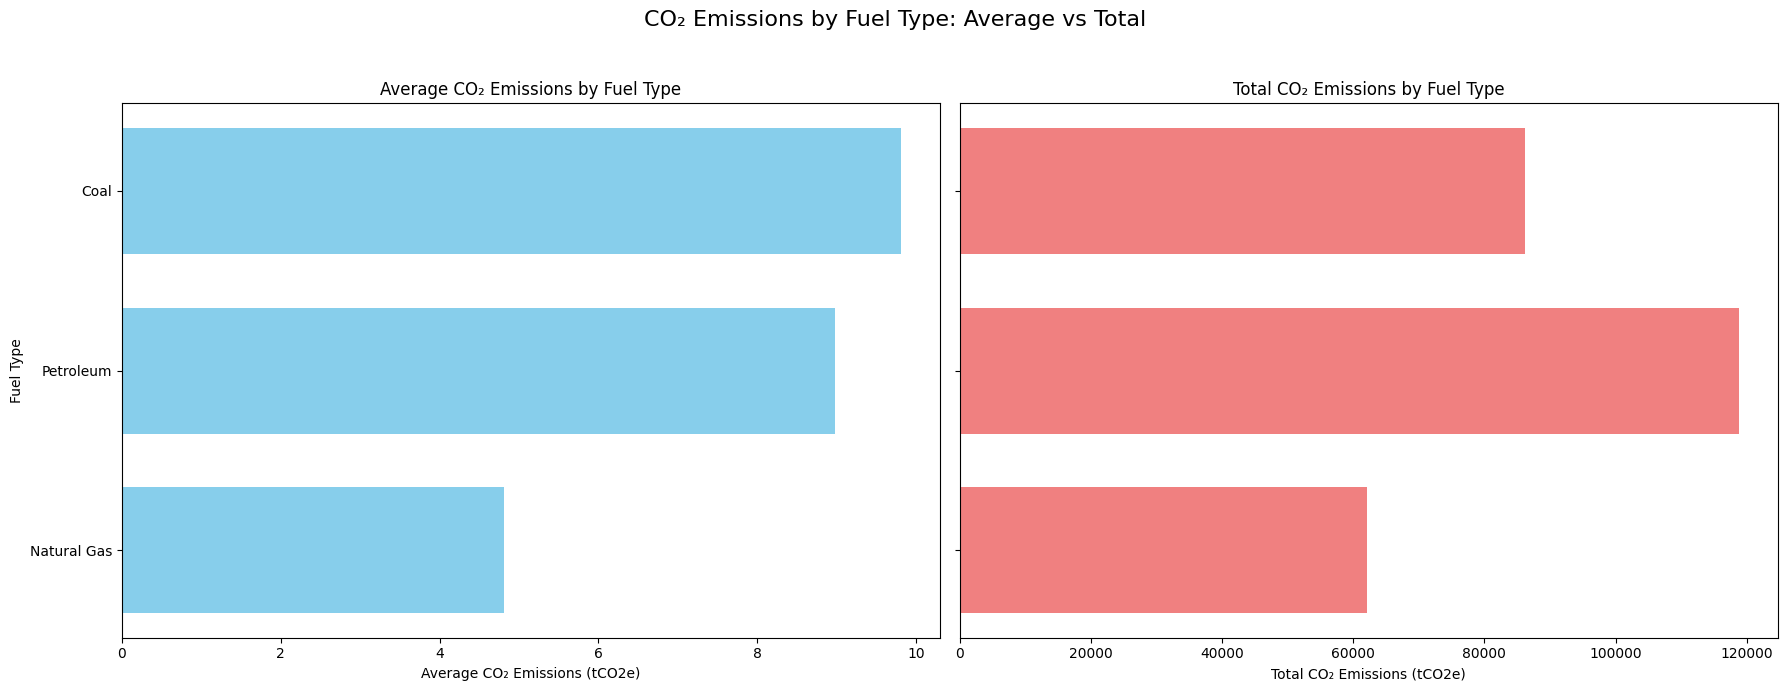

In [22]:
# Create figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7), sharey=True)  # Side by side

# --- Average Emissions by Fuel Type ---
emissions_by_fuel_avg = df1.groupby("fuel-name")["CO2 Emissions (tCO2e)"].mean().reset_index()
emissions_by_fuel_avg = emissions_by_fuel_avg.sort_values(by="CO2 Emissions (tCO2e)", ascending=True)

ax1.barh(
    y=emissions_by_fuel_avg["fuel-name"],
    width=emissions_by_fuel_avg["CO2 Emissions (tCO2e)"],
    color="skyblue",
    height=0.7
)
ax1.set_xlabel('Average CO₂ Emissions (tCO2e)')
ax1.set_ylabel('Fuel Type')
ax1.set_title('Average CO₂ Emissions by Fuel Type')

# --- Total Emissions by Fuel Type ---
emissions_by_fuel_total = df1.groupby("fuel-name")["CO2 Emissions (tCO2e)"].sum().reset_index()
emissions_by_fuel_total = emissions_by_fuel_total.sort_values(by="CO2 Emissions (tCO2e)", ascending=True)

ax2.barh(
    y=emissions_by_fuel_total["fuel-name"],
    width=emissions_by_fuel_total["CO2 Emissions (tCO2e)"],
    color="lightcoral",
    height=0.7
)
ax2.set_xlabel('Total CO₂ Emissions (tCO2e)')
ax2.set_title('Total CO₂ Emissions by Fuel Type')

# Layout
plt.suptitle("CO₂ Emissions by Fuel Type: Average vs Total", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Dominance of Specific Fuel Types: The horizontal bar charts clearly show that certain fuel types are significantly larger contributors to both average and total CO₂ emissions than others.

Major Contributors: The fuel types with the longest bars represent those responsible for the largest volumes of CO₂ emissions (total emissions) and those with the highest emission intensity per recorded activity (average emissions). These fuel types are critical areas for decarbonization efforts.

Coal vs. Petroleum: Total vs. Average Emissions: A notable disparity observed is that Coal tends to have a higher total CO₂ emission contribution, while Petroleum often shows a higher average emission per record. This difference can be attributed to several factors. Coal has historically been a dominant fuel source for large-scale electricity generation, leading to very high cumulative total emissions over the period.

Petroleum, on the other hand, is a primary fuel for the transportation sector, which involves a vast number of individual vehicles and activities. While each individual instance of petroleum use might not emit as much as a large coal-fired power plant, the sheer number of records or activities associated with petroleum consumption results in a higher average emission value across all petroleum-related data points in the dataset. This highlights that coal's impact is driven by large-scale, consistent use, while petroleum's impact is significant due to the widespread and numerous instances of its use.



Temporal trends in emsissions

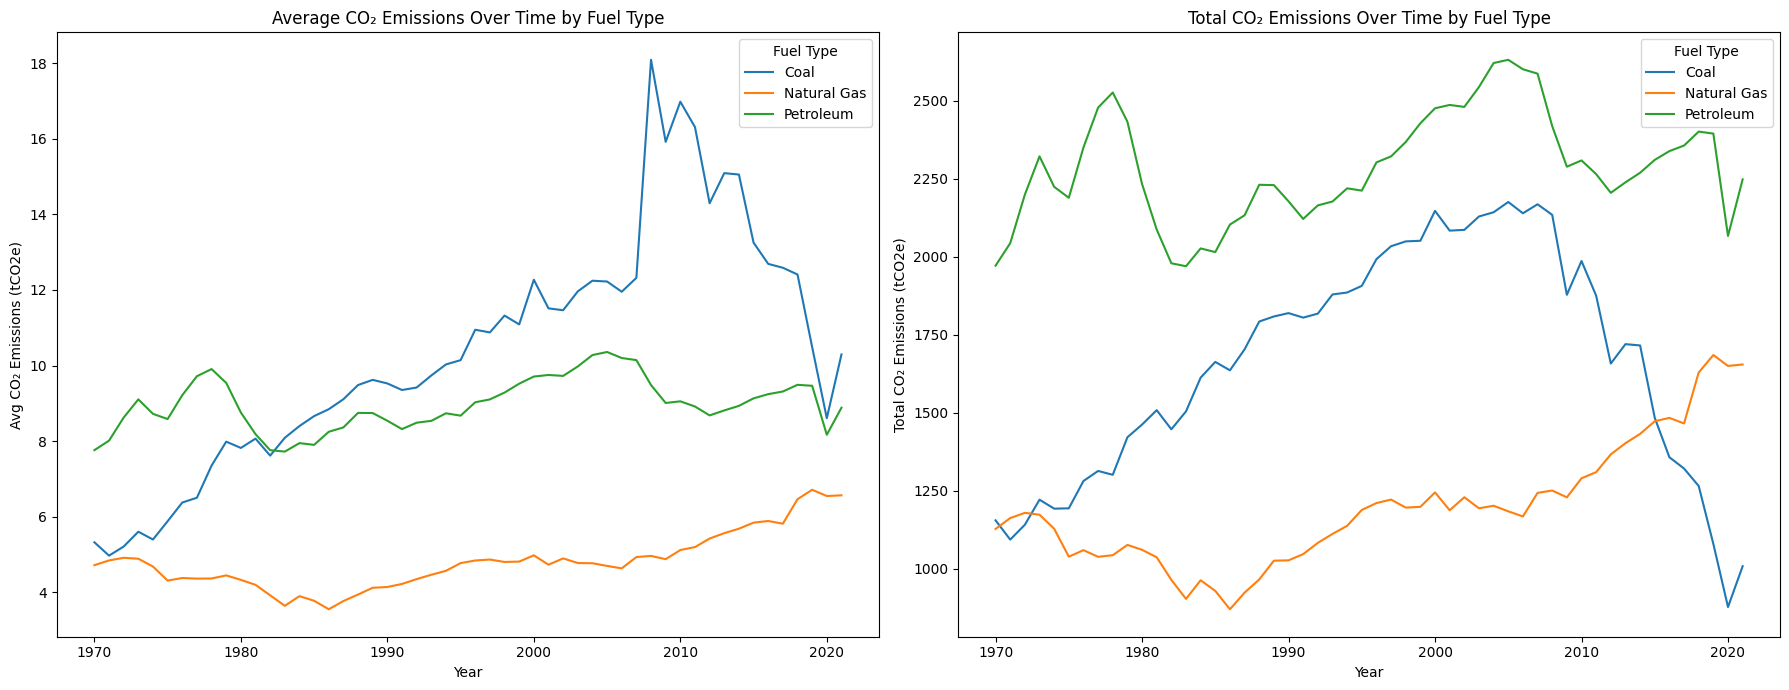

In [23]:
# --- AVERAGE EMISSIONS BY FUEL TYPE ---
avg_emissions_by_fuel = df1.groupby(['year', 'fuel-name'])['CO2 Emissions (tCO2e)'].mean().reset_index()

# --- TOTAL EMISSIONS BY FUEL TYPE ---
total_emissions_by_fuel = df1.groupby(['year', 'fuel-name'])['CO2 Emissions (tCO2e)'].sum().reset_index()

# --- PLOTTING SIDE BY SIDE ---
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=False)

# Left: Average emissions
for fuel_type in avg_emissions_by_fuel['fuel-name'].unique():
    fuel_data = avg_emissions_by_fuel[avg_emissions_by_fuel['fuel-name'] == fuel_type]
    axes[0].plot(fuel_data['year'], fuel_data['CO2 Emissions (tCO2e)'], label=fuel_type)

axes[0].set_title('Average CO₂ Emissions Over Time by Fuel Type')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Avg CO₂ Emissions (tCO2e)')
axes[0].legend(title='Fuel Type')

# Right: Total emissions
for fuel_type in total_emissions_by_fuel['fuel-name'].unique():
    fuel_data = total_emissions_by_fuel[total_emissions_by_fuel['fuel-name'] == fuel_type]
    axes[1].plot(fuel_data['year'], fuel_data['CO2 Emissions (tCO2e)'], label=fuel_type)

axes[1].set_title('Total CO₂ Emissions Over Time by Fuel Type')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Total CO₂ Emissions (tCO2e)')
axes[1].legend(title='Fuel Type')

# Improve layout
plt.tight_layout()
plt.show()

The figure above illustrates average (left) and total (right) CO₂ emissions in the U.S. over time, categorized by fuel type—Coal, Natural Gas, and Petroleum—from 1970 to 2021. Together, these charts provide a comprehensive view of how different fuels have contributed to national carbon emissions, both per record and in absolute terms.

In the average emissions plot, coal has historically shown a steady increase in average CO₂ emissions per entry, peaking around 2008–2010 before declining. This suggests that while coal was long a dominant and highly emitting fuel, its usage has tapered in recent years, possibly due to environmental regulations, coal plant retirements, and a shift toward cleaner energy sources. Petroleum displays a stable trend with a mild increase in average emissions, while natural gas maintains the lowest average emissions per entry, though it has been gradually increasing, especially after 2010, likely due to its expanded role in electricity generation and industrial use.

The total emissions chart highlights petroleum as the dominant fuel in terms of overall CO₂ output across the entire time period, reflecting its widespread use in transportation and industry. Coal had a rapid rise from the 1970s, peaking in the early 2000s, but then experienced a sharp decline after 2010, reflecting the national energy transition away from coal. In contrast, natural gas saw a dramatic and steady increase in total emissions since the mid-2000s, eventually surpassing coal by 2015—underscoring the role of fracking and the growing reliance on gas as a “bridge fuel” in energy policy.

Overall, this figure demonstrates a clear fuel shift: away from coal, sustained reliance on petroleum, and increasing dependence on natural gas. These trends reflect broader structural and policy changes in the U.S. energy landscape, such as decarbonization goals, technological innovation, and market shifts toward cleaner-burning fuels.




**Emissions by sector**

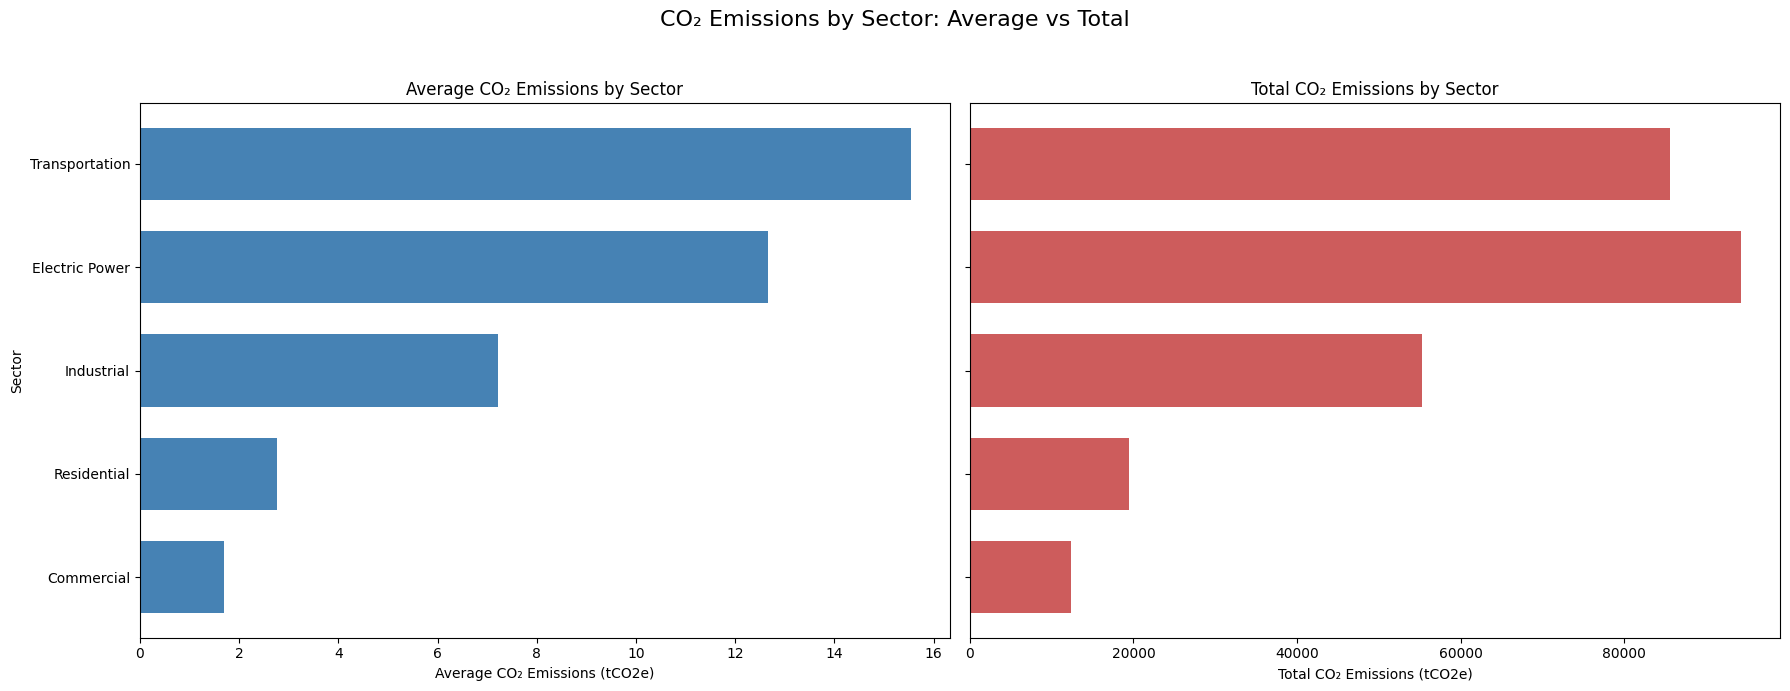

In [24]:
# Create side-by-side subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7), sharey=True)

# --- Average Emissions by Sector ---
emissions_by_sector_avg = df1.groupby("sector-name")["CO2 Emissions (tCO2e)"].mean().reset_index()
emissions_by_sector_avg = emissions_by_sector_avg.sort_values(by="CO2 Emissions (tCO2e)", ascending=True)

ax1.barh(
    y=emissions_by_sector_avg["sector-name"],
    width=emissions_by_sector_avg["CO2 Emissions (tCO2e)"],
    color="steelblue",
    height=0.7
)
ax1.set_xlabel("Average CO₂ Emissions (tCO2e)")
ax1.set_ylabel("Sector")
ax1.set_title("Average CO₂ Emissions by Sector")

# --- Total Emissions by Sector ---
emissions_by_sector_total = df1.groupby("sector-name")["CO2 Emissions (tCO2e)"].sum().reset_index()
emissions_by_sector_total = emissions_by_sector_total.sort_values(by="CO2 Emissions (tCO2e)", ascending=True)

ax2.barh(
    y=emissions_by_sector_total["sector-name"],
    width=emissions_by_sector_total["CO2 Emissions (tCO2e)"],
    color="indianred",
    height=0.7
)
ax2.set_xlabel("Total CO₂ Emissions (tCO2e)")
ax2.set_title("Total CO₂ Emissions by Sector")

# Final layout adjustments
plt.suptitle("CO₂ Emissions by Sector: Average vs Total", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


On the left, the horizontal bar chart displays the average CO₂ emissions by sector. The data show that Transportation has the highest average emissions, followed closely by Electric Power. The Industrial sector has a moderate level of emissions, while Residential and Commercial sectors contribute significantly less on average.

On the right, the second bar chart shows the total CO₂ emissions for each sector. Here, Electric Power narrowly leads as the largest total emitter, slightly ahead of the Transportation sector. The Industrial sector again ranks third, with Residential and Commercial trailing behind with notably lower total emissions.

The high average and total emissions from the Transportation and Electric Power sectors underscore their dominant roles in the United States' carbon footprint.

Although Electric Power does not have the highest average emissions per unit (as Transportation does), its overall contribution is the highest, suggesting a broader scale or more sustained activity over time.

The Industrial sector maintains a consistent third position in both average and total emissions, indicating a moderate but significant and steady level of emissions.

Residential and Commercial sectors emit far less CO₂ both on average and in total, reflecting either greater energy efficiency, smaller scale, or lower fossil fuel dependency.

This analysis can guide policy and strategic efforts, highlighting that meaningful emission reductions should particularly focus on the Transportation and Electric Power sectors for maximum impact.

**Analysing Temporal trends in emissions**

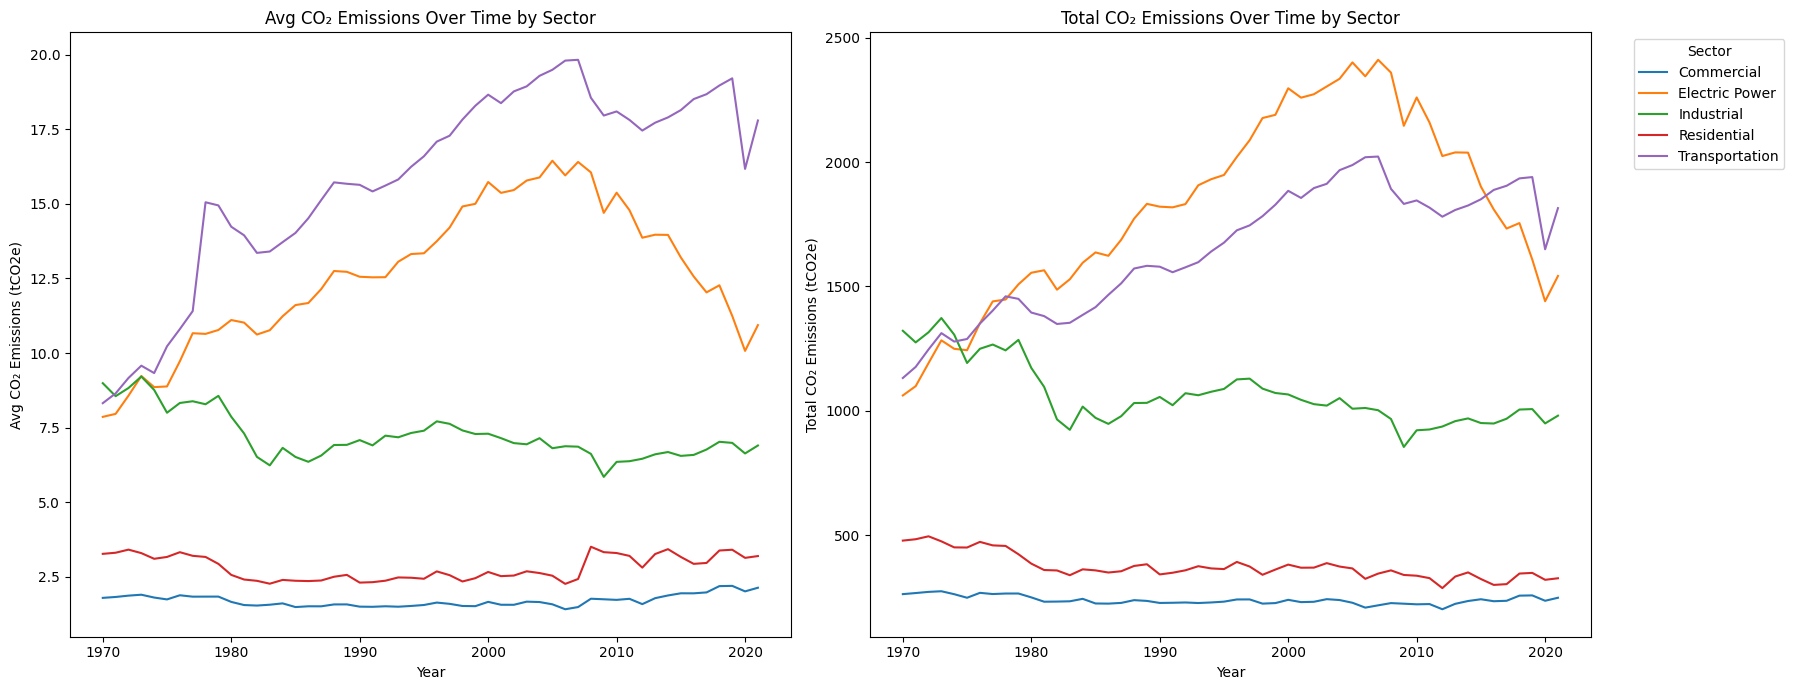

In [25]:
# --- AVERAGE EMISSIONS BY SECTOR ---
avg_emissions_by_sector = df1.groupby(['year', 'sector-name'])['CO2 Emissions (tCO2e)'].mean().reset_index()

# --- TOTAL EMISSIONS BY SECTOR ---
total_emissions_by_sector = df1.groupby(['year', 'sector-name'])['CO2 Emissions (tCO2e)'].sum().reset_index()

# --- PLOT SIDE BY SIDE ---
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=False)

# Left: Average emissions
for sector in avg_emissions_by_sector['sector-name'].unique():
    sector_data = avg_emissions_by_sector[avg_emissions_by_sector['sector-name'] == sector]
    axes[0].plot(sector_data['year'], sector_data['CO2 Emissions (tCO2e)'], label=sector)

axes[0].set_title('Avg CO₂ Emissions Over Time by Sector')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Avg CO₂ Emissions (tCO2e)')


# Right: Total emissions
for sector in total_emissions_by_sector['sector-name'].unique():
    sector_data = total_emissions_by_sector[total_emissions_by_sector['sector-name'] == sector]
    axes[1].plot(sector_data['year'], sector_data['CO2 Emissions (tCO2e)'], label=sector)

axes[1].set_title('Total CO₂ Emissions Over Time by Sector')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Total CO₂ Emissions (tCO2e)')
axes[1].legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


The figure above presents two key trend analyses of CO₂ emissions across economic sectors in the United States from 1970 to 2021. The left panel illustrates the average CO₂ emissions per record by sector, while the right panel shows total sectoral CO₂ emissions over the same period. Together, they offer insight into both the intensity and overall contribution of each sector to national emissions.

In the average emissions plot, the Transportation sector stands out consistently with the highest average CO₂ emissions per entry, indicating it is a high-emitting activity on a per-record basis. This likely reflects the large carbon output per unit (e.g., vehicles, fuel combustion) in the transport industry. The Industrial and Electric Power sectors also show elevated average emissions, with Electric Power rising sharply from 1970 and peaking in the early 2000s before gradually declining—reflecting cleaner technologies, regulatory shifts, and the move away from coal in electricity generation.

The total emissions plot offers a different narrative. Here, Electric Power dominates overall CO₂ contributions until around 2010, when emissions begin to decline—likely due to transitions to natural gas and renewables. Meanwhile, Transportation catches up and maintains a steady upward trend, nearly overtaking Electric Power in total emissions by 2021. The Industrial sector shows relatively stable emissions over the years, while Residential and Commercial sectors remain consistently low contributors in both total and average emissions, pointing to smaller-scale, but steady, energy usage patterns.

Overall, these plots emphasize that while Electric Power and Transportation have been the primary drivers of national CO₂ emissions, their patterns differ: Electric Power emissions are large but decreasing, while Transportation emissions are persistently high and growing. This reinforces the importance of targeted mitigation strategies tailored to each sector’s structure and emission dynamics.

# Exploring Texas Data

In [26]:
# Extracting Texas Data from the dataframe

# Filter for Texas only
texas_df = df1[df1["state-name"] == "Texas"]
texas_df.head()


,year,state-name,sector-name,fuel-name,CO2 Emissions (tCO2e)
596,1970,Texas,Residential,Coal,0.001344
597,1970,Texas,Industrial,Natural Gas,133.118012
598,1970,Texas,Industrial,Petroleum,53.316855
599,1970,Texas,Industrial,Coal,2.795201
600,1970,Texas,Electric Power,Natural Gas,57.807123


In [27]:
texas_df["state-name"].value_counts()


,count
state-name,
Texas,694


### Assessing Temporal trends in CO2 emissions

Uncovering temporal trends in emissions from 2000 onwards

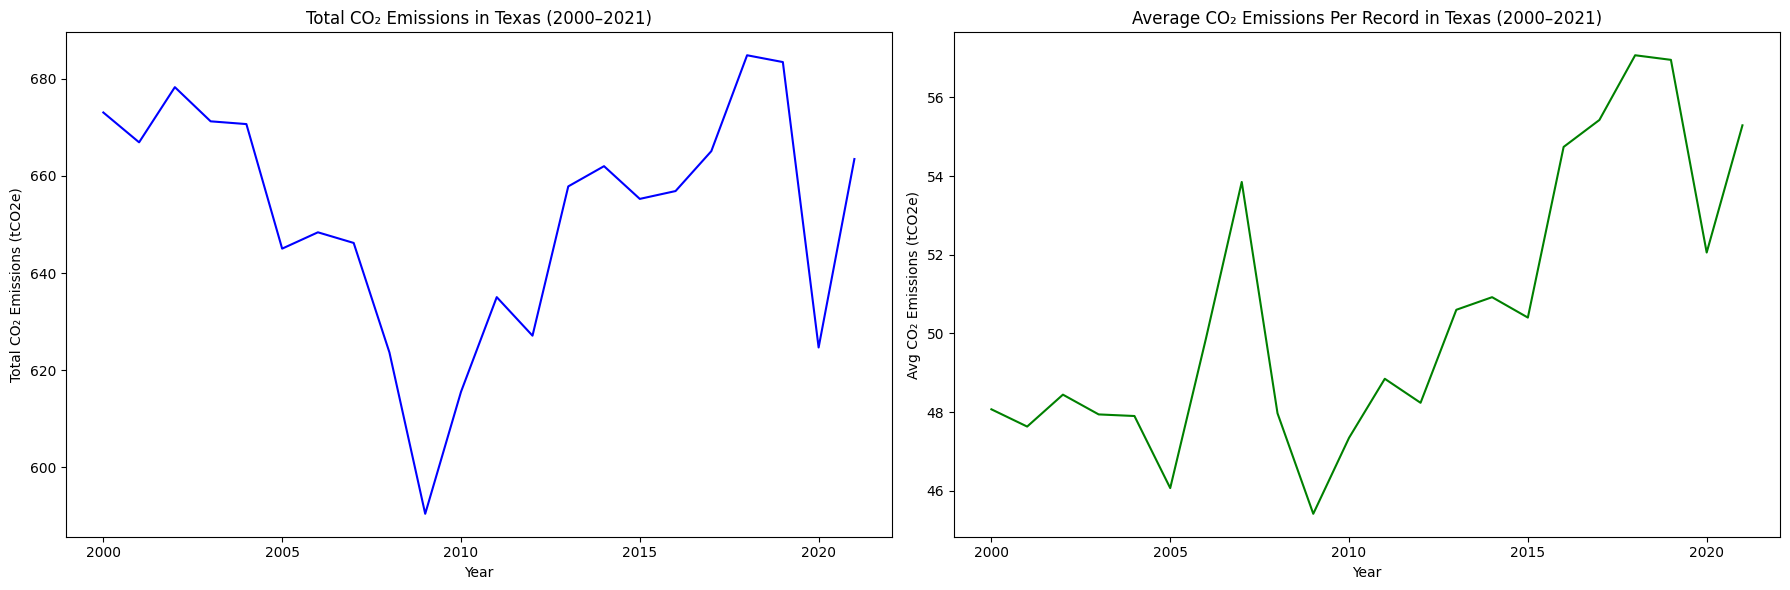

In [28]:
# Filter data for Texas from year 2000 onwards
texas_df_2000 = texas_df[texas_df["year"] >= 2000]

# Group data
emissions_by_year_sum = texas_df_2000.groupby("year")["CO2 Emissions (tCO2e)"].sum()
emissions_by_year_avg = texas_df_2000.groupby("year")["CO2 Emissions (tCO2e)"].mean()

# Set up side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # 1 row, 2 columns

# Plot total emissions
axes[0].plot(emissions_by_year_sum.index, emissions_by_year_sum.values, color='blue')
axes[0].set_title("Total CO₂ Emissions in Texas (2000–2021)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Total CO₂ Emissions (tCO2e)")

# Plot average emissions
axes[1].plot(emissions_by_year_avg.index, emissions_by_year_avg.values, color='green')
axes[1].set_title("Average CO₂ Emissions Per Record in Texas (2000–2021)")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Avg CO₂ Emissions (tCO2e)")

# Improve layout
plt.tight_layout()
plt.show()


Both the total and average CO₂ emissions in Texas show a broadly similar pattern over this period.
Emissions appear to be relatively high at the start of the 2000s.
There is generally an increase, or at least high stability, in emissions until a peak is reached, likely in the mid-to-late 2000s.

Following this peak, both total and average emissions show a noticeable downward trend, although this decline might have some fluctuations.
Towards the end of the period, leading up to 2021, the trend may show some signs of leveling off or even a slight upward movement, potentially influenced by economic activity or other recent events.
Interpretation of Temporal Trends:

Peak in the Mid-to-Late 2000s: The peak in emissions during this time period in Texas is consistent with the national trends observed earlier in the analysis. This period likely represents a time of high economic activity and reliance on fossil fuels.
Post-Peak Decline: The subsequent decline in both total and average emissions suggests that factors have been at play reducing Texas's carbon footprint. This could be attributed to:

Shifting Energy Mix: A move away from more carbon-intensive fuels like coal towards natural gas or renewable energy sources for power generation.
Economic Factors: Economic downturns (like the 2008 financial crisis) can lead to reduced industrial activity and energy demand, thus lowering emissions.
Efficiency Improvements: Increased energy efficiency in various sectors can contribute to lower emissions per unit of activity.


Policy Impacts: While not explicitly detailed in the graphs, state or federal policies related to emissions or energy could have played a role.
Relationship Between Total and Average: The similar trends in total and average emissions indicate that the changes in overall emissions are closely tied to the average emission intensity of activities recorded in the dataset. This suggests that reductions are likely coming from changes that affect the typical emission level rather than just an increase or decrease in the number of emission sources.
Recent Fluctuations: Any leveling off or slight increase towards 2021 could reflect a rebound in economic activity after events like the initial phase of the COVID-19 pandemic, or other ongoing shifts in the state's energy and industrial landscape.

In essence, the graphs for Texas show a trajectory where, after reaching a peak, the state has seen a reduction in its CO₂ emissions intensity and overall volume, likely driven by a combination of economic and energy system changes. However, Texas remains a significant emitter, and the trends highlight the ongoing challenges and potential impacts of future economic and energy policy decisions on its emissions profile.

In [29]:
# Group by fuel type and calculate average emissions
avg_fuel_emissions_tx = (
    texas_df_2000.groupby("fuel-name")["CO2 Emissions (tCO2e)"]
    .mean()
    .reset_index()
    .sort_values(by="CO2 Emissions (tCO2e)", ascending=False)
)

# Round for better readability
avg_fuel_emissions_tx["CO2 Emissions (tCO2e)"] = avg_fuel_emissions_tx["CO2 Emissions (tCO2e)"].round(2)

# Display
print(avg_fuel_emissions_tx)


     fuel-name  CO2 Emissions (tCO2e)
2    Petroleum                  60.10
0         Coal                  46.81
1  Natural Gas                  42.65


In [30]:
# Group by fuel type and calculate total emissions
total_fuel_emissions_tx = (
    texas_df_2000.groupby("fuel-name")["CO2 Emissions (tCO2e)"]
    .sum()  # Changed from mean() to sum()
    .reset_index()
    .sort_values(by="CO2 Emissions (tCO2e)", ascending=False)
)

# Round for better readability (optional, but good practice for consistency)
total_fuel_emissions_tx["CO2 Emissions (tCO2e)"] = total_fuel_emissions_tx["CO2 Emissions (tCO2e)"].round(2)

# Display
print("Total CO₂ Emissions in Texas by Fuel Type:")
print(total_fuel_emissions_tx)

Total CO₂ Emissions in Texas by Fuel Type:
     fuel-name  CO2 Emissions (tCO2e)
2    Petroleum                6610.75
1  Natural Gas                4691.60
0         Coal                3042.52


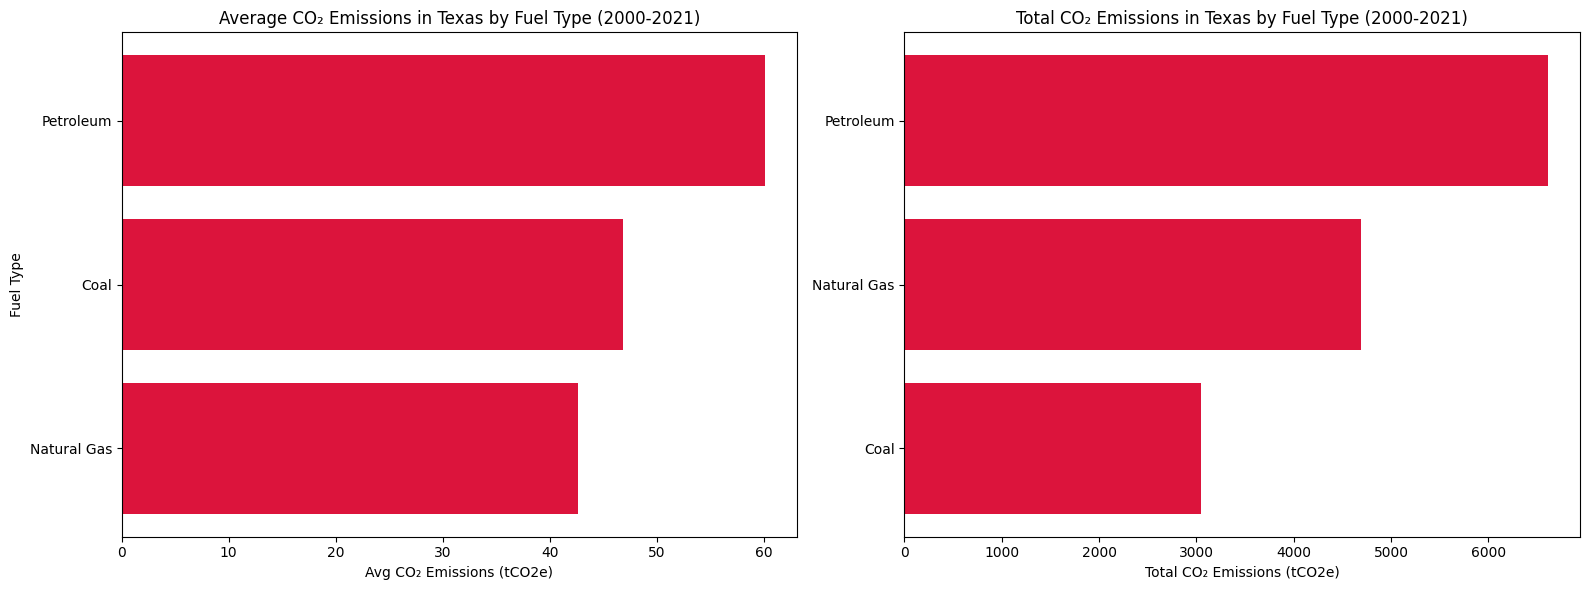

In [31]:
# Set up side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# --- Average Emissions by Fuel Type ---
avg_fuel_emissions_tx = (
    texas_df_2000.groupby("fuel-name")["CO2 Emissions (tCO2e)"]
    .mean()
    .reset_index()
    .sort_values(by="CO2 Emissions (tCO2e)", ascending=False)
)

# --- Average CO₂ Emissions in Texas by Fuel Type ---
axes[0].barh(avg_fuel_emissions_tx["fuel-name"], avg_fuel_emissions_tx["CO2 Emissions (tCO2e)"], color="crimson")
axes[0].set_title("Average CO₂ Emissions in Texas by Fuel Type (2000-2021)")
axes[0].set_xlabel("Avg CO₂ Emissions (tCO2e)")
axes[0].set_ylabel("Fuel Type")
axes[0].invert_yaxis()  # Highest bar at the top


# --- Total Emissions by Sector ---
total_fuel_emissions_tx = (
    texas_df_2000.groupby("fuel-name")["CO2 Emissions (tCO2e)"]
    .sum()  # Changed from mean() to sum()
    .reset_index()
    .sort_values(by="CO2 Emissions (tCO2e)", ascending=False)
)

# --- Total CO₂ Emissions in Texas by Fuel Type ---
axes[1].barh(total_fuel_emissions_tx["fuel-name"], total_fuel_emissions_tx["CO2 Emissions (tCO2e)"], color="crimson")
axes[1].set_title("Total CO₂ Emissions in Texas by Fuel Type (2000-2021)")
axes[1].set_xlabel("Total CO₂ Emissions (tCO2e)")
axes[1].invert_yaxis()

# Layout fix
plt.tight_layout()
plt.show()


The left bar chart, depicting average annual CO₂ emissions in Texas by fuel type, showed that petroleum was the most significant contributor, with the highest average emissions per year. Coal followed, while natural gas had the lowest average emissions. This suggests that petroleum has been the most consistently used and carbon-intensive fuel in Texas, playing a dominant role in the state’s emissions profile. The comparatively lower average for natural gas may reflect either cleaner combustion properties or a more recent rise in usage.

The right bar chart, which visualized total cumulative CO₂ emissions from 2000 to 2021, confirmed that petroleum remained the top contributor over the entire period. However, natural gas surpassed coal in total emissions, despite having a lower annual average. This discrepancy indicates that while coal may have experienced peak usage during certain years, natural gas has likely been used more steadily across the entire period. It also hints at a broader energy transition in Texas, where reliance may be shifting from coal to cleaner-burning fuels such as natural gas.

Together, these graphs underscore the importance of analyzing both average and total emissions to fully understand temporal and structural dynamics in energy-related emissions. While total emissions provide a cumulative picture of environmental impact, average emissions offer insight into year-to-year intensity. In Texas’s case, the data suggests a persistent dependence on petroleum, a gradual shift in fuel preferences, and nuanced temporal patterns in how different fuels contribute to emissions.

Analysing emissions by sector

In [32]:
# Group by sector and calculate average CO₂ emissions in Texas
avg_sector_emissions_tx = (
    texas_df_2000.groupby("sector-name")["CO2 Emissions (tCO2e)"]
    .mean()
    .reset_index()
    .sort_values(by="CO2 Emissions (tCO2e)", ascending=False)
)

# Round for clarity
avg_sector_emissions_tx["CO2 Emissions (tCO2e)"] = avg_sector_emissions_tx["CO2 Emissions (tCO2e)"].round(2)

# Display results
print(avg_sector_emissions_tx)


      sector-name  CO2 Emissions (tCO2e)
4  Transportation                  99.60
1  Electric Power                  72.60
2      Industrial                  70.09
3     Residential                   5.45
0      Commercial                   4.62


In [33]:
# Group by sector and calculate total CO₂ emissions in Texas
total_sector_emissions_tx = (
    texas_df_2000.groupby("sector-name")["CO2 Emissions (tCO2e)"]
    .sum()  # Changed from mean() to sum()
    .reset_index()
    .sort_values(by="CO2 Emissions (tCO2e)", ascending=False)
)

# Round for clarity (optional, but good practice)
total_sector_emissions_tx["CO2 Emissions (tCO2e)"] = total_sector_emissions_tx["CO2 Emissions (tCO2e)"].round(2)

# Display results
print("Total CO₂ Emissions in Texas by Sector:")
print(total_sector_emissions_tx)

Total CO₂ Emissions in Texas by Sector:
      sector-name  CO2 Emissions (tCO2e)
1  Electric Power                4791.55
2      Industrial                4625.65
4  Transportation                4382.53
0      Commercial                 272.64
3     Residential                 272.49


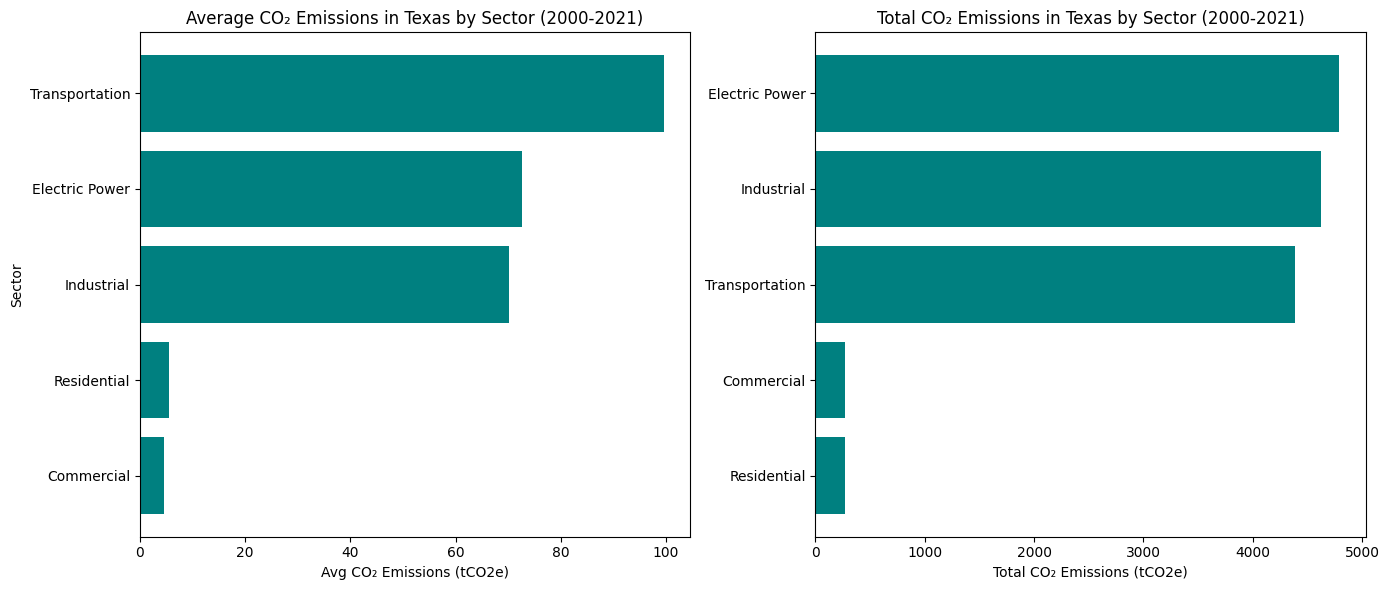

In [34]:
# Create a figure with two subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Group by sector and calculate average CO₂ emissions in Texas
avg_sector_emissions_tx = (
    texas_df_2000.groupby("sector-name")["CO2 Emissions (tCO2e)"]
    .mean()
    .reset_index()
    .sort_values(by="CO2 Emissions (tCO2e)", ascending=True)
)

# First horizontal bar chart - Average CO₂ Emissions by Sector
ax[0].barh(avg_sector_emissions_tx["sector-name"], avg_sector_emissions_tx["CO2 Emissions (tCO2e)"], color="teal")
ax[0].set_title("Average CO₂ Emissions in Texas by Sector (2000-2021)")
ax[0].set_xlabel("Avg CO₂ Emissions (tCO2e)")
ax[0].set_ylabel("Sector")
ax[0].tick_params(axis="y", rotation=0)



# Group by sector and calculate total CO₂ emissions in Texas
total_sector_emissions_tx = (
    texas_df_2000.groupby("sector-name")["CO2 Emissions (tCO2e)"]
    .sum()  # Changed from mean() to sum()
    .reset_index()
    .sort_values(by="CO2 Emissions (tCO2e)", ascending=True)
)

# Second horizontal bar chart - Total CO₂ Emissions by Sector
ax[1].barh(total_sector_emissions_tx["sector-name"], total_sector_emissions_tx["CO2 Emissions (tCO2e)"], color="teal")
ax[1].set_title("Total CO₂ Emissions in Texas by Sector (2000-2021)")
ax[1].set_xlabel("Total CO₂ Emissions (tCO2e)")
ax[1].tick_params(axis="y", rotation=0)

# Adjust layout to avoid overlapping labels
plt.tight_layout()

# Show the plots
plt.show()


The left bar chart, which depicts average CO₂ emissions in Texas by sector, revealed that the Transportation sector had the highest average emissions per year. This is likely due to Texas's extensive road networks, high vehicle ownership rates, and limited use of public transportation, all of which contribute to consistently high emissions from vehicle fuel combustion. The Electric Power and Industrial sectors followed closely behind, with similar average emissions. This trend reflects Texas’s reliance on fossil fuels for electricity generation and the presence of energy-intensive industrial operations such as oil refining and chemical manufacturing. In contrast, the Residential and Commercial sectors had the lowest average emissions, suggesting their comparatively smaller role in the state's overall carbon footprint.

The right barchart, showing total CO₂ emissions by sector over the 2000–2021 period, painted a slightly different picture. Here, the Electric Power sector emerged as the largest cumulative emitter, just ahead of the Industrial and Transportation sectors. This indicates that, although the Transportation sector leads in average annual emissions, Electric Power has had a more sustained and consistent impact over the entire period. The Industrial sector also maintained a significant cumulative contribution, consistent with Texas’s strong industrial base. Once again, the Residential and Commercial sectors accounted for the smallest share of total emissions, reinforcing their relatively limited impact in the broader emissions landscape.

By comparing average and total emissions, important insights about emission patterns were uncovered. For example, sectors with the highest average emissions are not always the highest in cumulative impact, as seen in the case of Transportation versus Electric Power. This distinction is important because it suggests different strategies may be needed for reducing emissions in each sector—whether targeting peak annual emissions or long-term steady contributors. Ultimately, the analysis highlighted the need for a multi-sectoral approach to emissions reduction in Texas, with particular focus on the Electric Power, Industrial, and Transportation sectors, which together dominate the state’s emissions profile.

**Analysing temporal trends in emissions from 2000 onwards for sector**

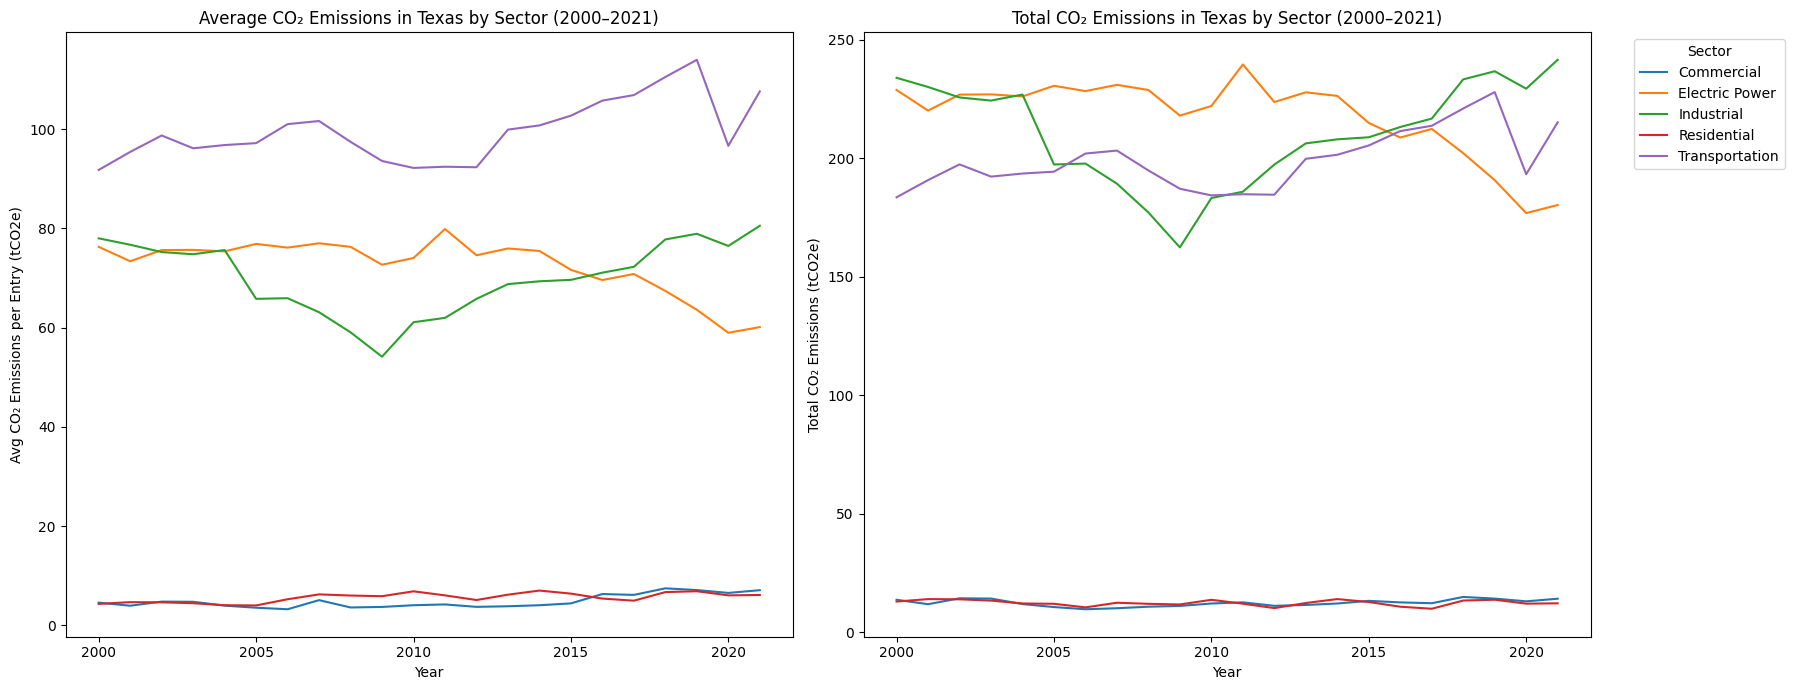

In [35]:
# --- Group by year and sector, and calculate average emissions ---
avg_sector_emissions_tx = (
    texas_df_2000.groupby(["year", "sector-name"])["CO2 Emissions (tCO2e)"]
    .mean()
    .reset_index()
)

# --- Group by year and sector, and calculate total emissions ---
total_sector_emissions_tx = (
    texas_df_2000.groupby(["year", "sector-name"])["CO2 Emissions (tCO2e)"]
    .sum()
    .reset_index()
)

# Set up side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(18, 7))  # 1 row, 2 columns

# --- Plot average emissions ---
for sector in avg_sector_emissions_tx["sector-name"].unique():
    data = avg_sector_emissions_tx[avg_sector_emissions_tx["sector-name"] == sector]
    axes[0].plot(data["year"], data["CO2 Emissions (tCO2e)"], label=sector)

axes[0].set_title("Average CO₂ Emissions in Texas by Sector (2000–2021)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Avg CO₂ Emissions per Entry (tCO2e)")

# --- Plot total emissions ---
for sector in total_sector_emissions_tx["sector-name"].unique():
    data = total_sector_emissions_tx[total_sector_emissions_tx["sector-name"] == sector]
    axes[1].plot(data["year"], data["CO2 Emissions (tCO2e)"], label=sector)

axes[1].set_title("Total CO₂ Emissions in Texas by Sector (2000–2021)")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Total CO₂ Emissions (tCO2e)")
axes[1].legend(title="Sector", bbox_to_anchor=(1.05, 1), loc="upper left")

# Layout
plt.tight_layout()
plt.show()


The left plot, which tracks average CO₂ emissions per entry by sector over time, reveals that the Transportation sector (purple line) consistently recorded the highest average emissions throughout the entire period. Despite some fluctuations, emissions from transportation showed a general upward trend, especially after 2015, likely reflecting increased vehicle usage, population growth, or a rebound after the 2008 financial crisis. The Electric Power sector (orange line) initially maintained high average emissions but experienced a declining trend after 2010, suggesting the sector may have adopted cleaner energy sources such as natural gas or renewables during that time. The Industrial sector (green line) displayed more variability, with a dip around 2008–2010, possibly due to the economic downturn, followed by a gradual recovery in average emissions. In contrast, the Residential (red) and Commercial (blue) sectors remained relatively flat and low, consistently producing the lowest average emissions, indicating minimal change in their carbon output patterns.

The right plot, showing total CO₂ emissions by sector per year, complements the average emissions trends by providing a cumulative annual snapshot. Notably, Electric Power (orange) and Industrial (green) sectors were the leading contributors to total emissions for much of the period. However, Transportation (purple) exhibited a strong upward trend in total emissions after 2015, eventually surpassing Electric Power by the end of the period. This suggests a potential shift in the primary source of Texas's CO₂ emissions, from stationary sources like power plants to mobile sources like vehicles. The Industrial sector also showed an increase in total emissions toward the end of the period, nearly matching or exceeding Electric Power in some years. Again, Residential and Commercial sectors remained consistently low in total emissions, reinforcing their relatively limited impact on Texas’s overall carbon profile.

By examining both average and total emissions over time, this analysis highlights important structural changes in Texas's emissions landscape. The decline in Electric Power emissions reflects broader decarbonization trends in the energy sector, likely spurred by cleaner generation methods and regulatory pressure. Meanwhile, the rise in Transportation emissions, both in average and total terms, points to a growing challenge in reducing emissions from vehicles, which are more diffuse and harder to regulate than centralized sources. These findings emphasize the need for targeted climate action that not only continues to decarbonize electricity generation but also begins to aggressively address emissions from transportation.

**Analysing temporal trends in emissions from 2000 onwards for fuel type**

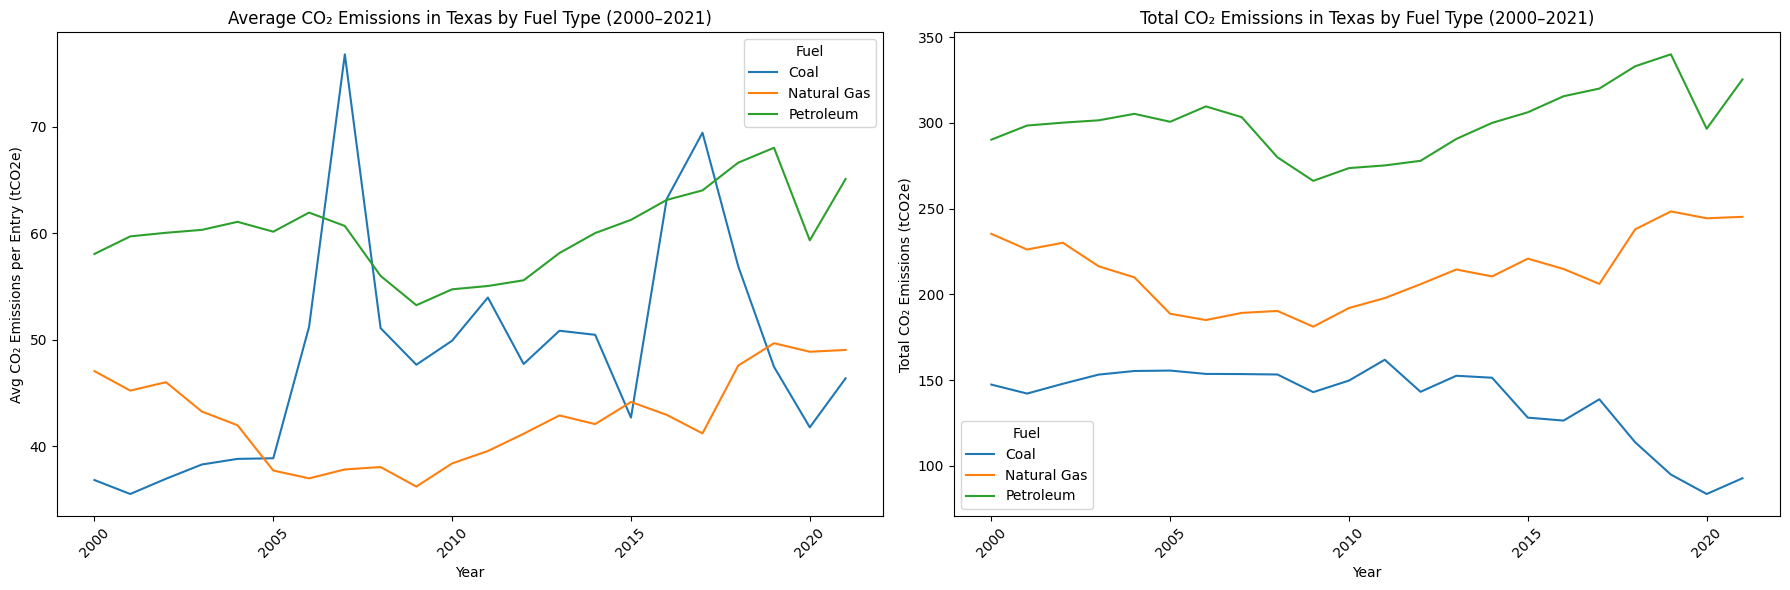

In [36]:
# Average emissions by fuel over time (Texas only)
avg_fuel_emissions_tx = (
    texas_df_2000.groupby(["year", "fuel-name"])["CO2 Emissions (tCO2e)"]
    .mean()
    .reset_index()
)

# Total emissions by fuel over time (Texas only)
total_fuel_emissions_tx = (
    texas_df_2000.groupby(["year", "fuel-name"])["CO2 Emissions (tCO2e)"]
    .sum()  # Changed from mean() to sum()
    .reset_index()
)

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # 1 row, 2 columns

# Plot for average emissions
for fuel in avg_fuel_emissions_tx["fuel-name"].unique():
    data = avg_fuel_emissions_tx[avg_fuel_emissions_tx["fuel-name"] == fuel]
    axes[0].plot(data["year"], data["CO2 Emissions (tCO2e)"], label=fuel)

axes[0].set_title("Average CO₂ Emissions in Texas by Fuel Type (2000–2021)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Avg CO₂ Emissions per Entry (tCO2e)")
axes[0].legend(title="Fuel")
axes[0].tick_params(axis='x', rotation=45)

# Plot for total emissions
for fuel in total_fuel_emissions_tx["fuel-name"].unique():
    data = total_fuel_emissions_tx[total_fuel_emissions_tx["fuel-name"] == fuel]
    axes[1].plot(data["year"], data["CO2 Emissions (tCO2e)"], label=fuel)

axes[1].set_title("Total CO₂ Emissions in Texas by Fuel Type (2000–2021)")  # Updated title
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Total CO₂ Emissions (tCO2e)")  # Updated label
axes[1].legend(title="Fuel")
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


The figure above presents a dual-panel visualization of CO₂ emissions in Texas from 2000 to 2021, disaggregated by fuel type—Coal, Natural Gas, and Petroleum. The left panel shows the average emissions per entry, while the right panel illustrates the total emissions over time.

From the average emissions plot (left panel), we observe that Petroleum consistently recorded the highest per-record CO₂ emissions throughout most of the 21-year period. Although there is some fluctuation, its average emissions remained relatively stable and high, particularly after 2010. Coal, on the other hand, exhibits notable spikes—particularly in 2007 and 2016—suggesting the presence of unusually high-emitting records in those years, possibly from specific industrial activities or energy events. Meanwhile, Natural Gas maintained the lowest average emissions per record across most of the timeline, showing a slight upward trend toward the later years, indicating increased reliance or more intensive usage per reporting instance.

Turning to the total emissions plot (right panel), the landscape shifts slightly. Petroleum is the dominant source of total CO₂ emissions in Texas, maintaining the highest overall contributions across all years. Its total emissions slightly dip around 2009–2010—likely due to economic slowdown—but subsequently rise again, peaking around 2020–2021. Natural Gas ranks second in total emissions, also showing a rebound after 2010, which aligns with the U.S. shale boom and the expansion of gas-based energy production. Coal, although having relatively high average emissions in some years, shows a clear downward trend in total emissions, particularly after 2015. This reflects a gradual phase-out of coal in favor of cleaner or more efficient alternatives like natural gas and renewables.

In summary, while Petroleum remains the most significant contributor to CO₂ emissions in Texas, both in terms of average and total values, Coal is on the decline, and Natural Gas is steadily rising—a pattern that mirrors broader energy transitions in the U.S. This underscores Texas’s complex energy profile, where shifts in fuel preferences, policy, and market forces all shape the state’s emissions trajectory.

# Conclusion


This exploratory data analysis of U.S. CO₂ emissions provided meaningful insights into the spatial, temporal, and sectoral distribution of carbon emissions across the United States. By leveraging publicly available emissions data and Python-based data visualization, the project uncovered key trends relevant to climate reporting, ESG strategy development, and environmental policymaking.

The analysis revealed that CO₂ emissions vary significantly by state, sector, and fuel type, with Texas consistently emerging as a leading emitter due to its high dependence on fossil fuels such as petroleum and natural gas. Sector-level trends showed that electric power and transportation are dominant sources of emissions, both in aggregate and on average. Over time, emissions have fluctuated, often responding to macroeconomic and policy events such as the 2008 financial crisis and the COVID-19 pandemic.

The project also explored sector-fuel relationships and revealed strong correlations between specific fuel types and their primary consuming sectors—for instance, coal with electric power, and petroleum with transportation. Correlation matrices and pivot-based heatmaps supported these findings, offering both a macro- and micro-level view of emission dynamics.

State-level choropleth maps illustrated regional disparities in emissions, underscoring the need for localized climate action. Meanwhile, the deep dive into Texas post-2000 emissions revealed an interesting decoupling: while total emissions remained somewhat stable, average emissions per activity increased—indicating a potential shift toward more emission-intensive operations.

Overall, this project demonstrated how exploratory data analysis (EDA) can turn raw environmental datasets into actionable insights. It highlights the importance of multi-dimensional views in understanding emissions—from total output to per-record averages, and from national aggregates to granular sector-fuel breakdowns.

The findings from this analysis can be used to inform:

Corporate ESG and sustainability reporting;

Local and national climate policy;

Emission reduction target setting;

Strategic decision-making in high-emitting industries.

Future extensions of this work could involve time-series forecasting of emissions, machine learning models to predict sector-level intensities, or integration with climate risk and resilience indicators to build a more holistic decision-support system for stakeholders.

